# Seoul Bikes Sharing
The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

## Source
Seoul Bike Sharing Demand [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
cols = ['Date','Rented_Bike_Count','Hour','Temperature','Humidity','Wind_speed','Visibility','Dew_Pt_Temperature','Solar_Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning']
df = pd.read_csv('seoul_bike_data.csv')
df.columns = cols
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_Pt_Temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
df = df.drop(['Date', 'Holiday', 'Seasons','Hour'], axis =1)
df.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_Pt_Temperature,Solar_Radiation,Rainfall,Snowfall,Functioning
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [8]:
df['Functioning'] = (df['Functioning'] == 'Yes').astype(int)
df.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_Pt_Temperature,Solar_Radiation,Rainfall,Snowfall,Functioning
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


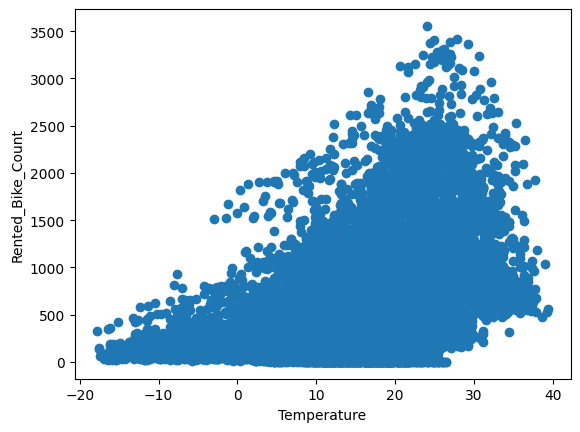

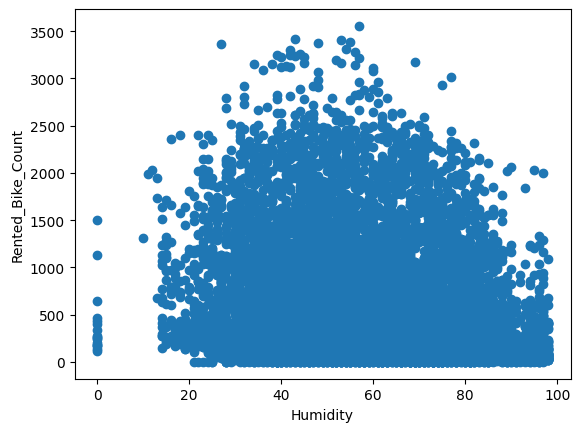

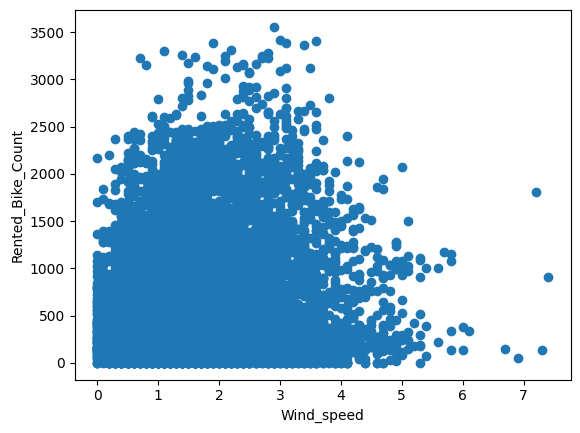

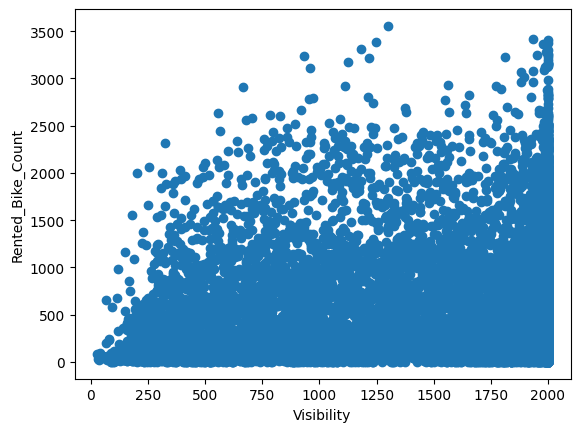

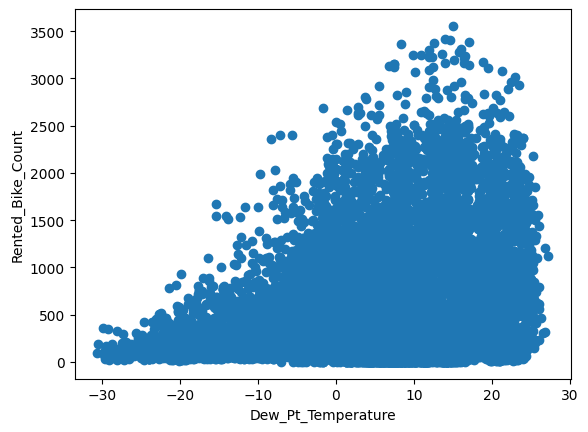

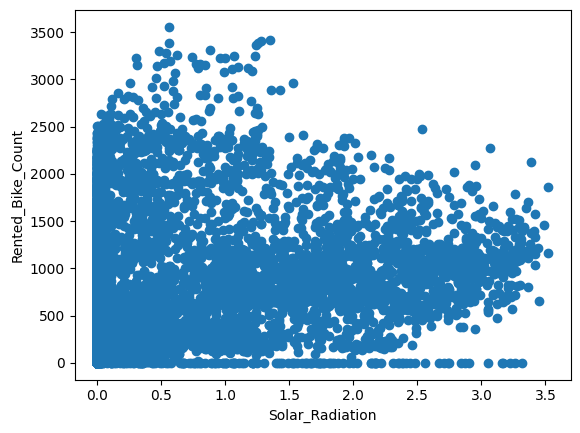

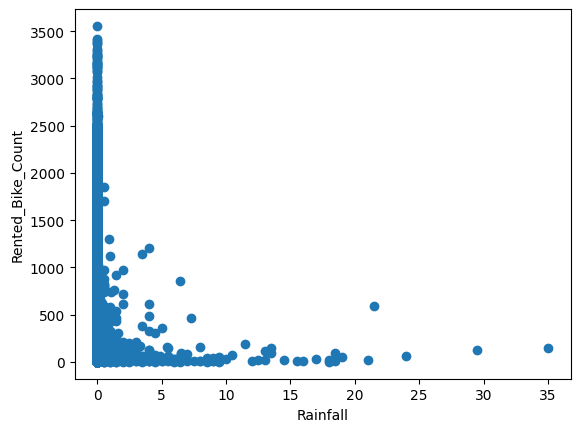

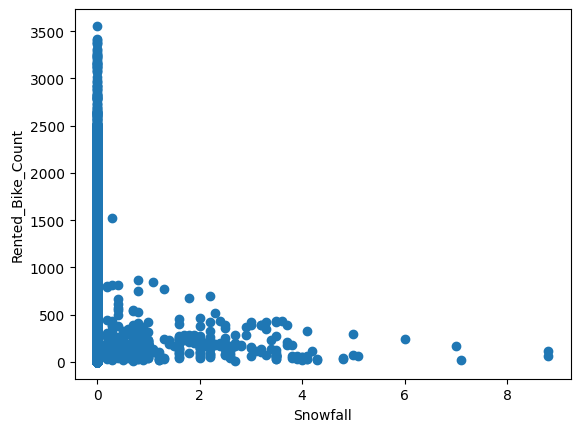

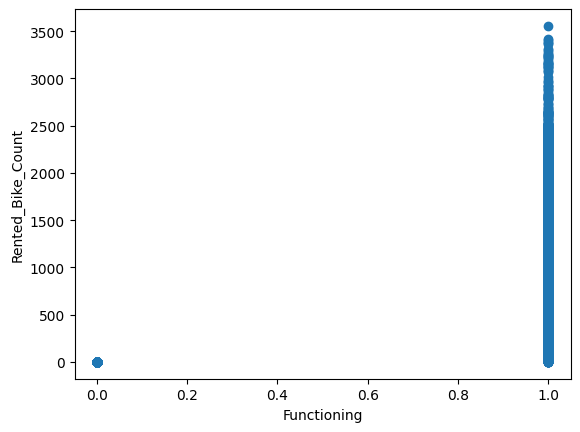

In [9]:
for label in df.columns[1:]:
  plt.scatter(df[label], df['Rented_Bike_Count'])
  plt.xlabel(label)
  plt.ylabel('Rented_Bike_Count')
  plt.show()

In [10]:
df = df.drop(['Wind_speed','Visibility','Functioning'], axis =1)
df.head()

,Rented_Bike_Count,Temperature,Humidity,Dew_Pt_Temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


# Train, Validation, Test Datasets

In [11]:
train, valid, test = np.split(df.sample(frac=1),[int(len(df) * 0.6), int(len(df) * 0.8)])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
def scale_dataset(dataframe, y_label, X_label=None,over_sampling=False):
  df = copy.deepcopy(dataframe)
  if X_label is None:
    X_label = [c for c in df.columns if c != y_label]
    X = df[X_label].values

  elif len(X_label) == 1:
    X = df[X_label].values
    X = np.reshape(X, (-1, 1))
  else:
    X = df[X_label].values

  X = StandardScaler().fit_transform(X)
  y= df[y_label].values

  if over_sampling:
    X, y = RandomOverSampler().fit_resample(X, y)

  y= np.reshape(y,(-1,1))

  data = np.hstack((X, y))

  return data, X, y

# Linear Regression
Simple regression, with just 1 feature Temperature

In [30]:
_, X_train_temp, y_train_temp = scale_dataset(train, 'Rented_Bike_Count',['Temperature'], over_sampling = True)
_, X_valid_temp, y_valid_temp = scale_dataset(valid, 'Rented_Bike_Count',['Temperature'])
_, X_test_temp, y_test_temp = scale_dataset(test, 'Rented_Bike_Count',['Temperature'])

In [31]:
temp_model = LinearRegression()
temp_model.fit(X_train_temp, y_train_temp)

LinearRegression()

In [32]:
y_pred_temp = temp_model.predict(X_test_temp)

In [33]:
temp_model.score(X_test_temp, y_test_temp) #R2 score

0.17986423465918733

In [34]:
print(f"MAE : {mean_absolute_error(y_test_temp,y_pred_temp)}")
print(f"MSE : {mean_squared_error(y_test_temp,y_pred_temp)}")
print(f"R2 : {r2_score(y_test_temp,y_pred_temp)}")

MAE : 464.8967658522889
MSE : 353612.5662627987
R2 : 0.17986423465918733


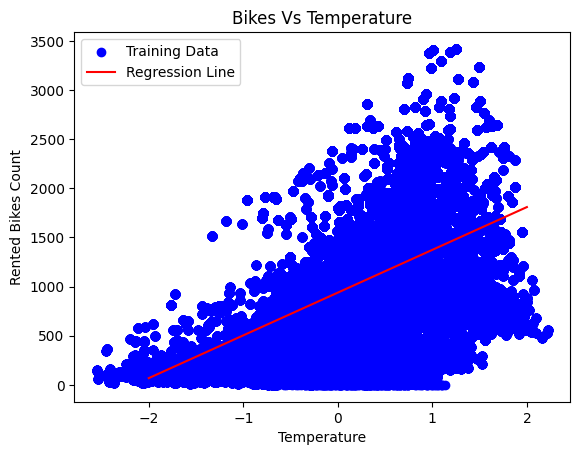

In [35]:
plt.scatter(X_train_temp,y_train_temp,color ='Blue',label='Training Data')
# plt.plot(X_test_temp,y_pred_temp,color='Red',label='Regression Line')
x = tf.linspace(-2,2,100)
x = np.reshape(x,(-1,1))
plt.plot(x,np.reshape(temp_model.predict(x),(-1,)), color='Red',label='Regression Line')
plt.ylabel('Rented Bikes Count')
plt.xlabel('Temperature')
plt.legend()
plt.title('Bikes Vs Temperature')
plt.show()

Multiple Linear Regression

In [32]:
_, X_train, y_train = scale_dataset(train, 'Rented_Bike_Count', over_sampling = True)
_, X_valid, y_valid = scale_dataset(valid, 'Rented_Bike_Count')
_, X_test, y_test = scale_dataset(test, 'Rented_Bike_Count')

In [33]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [34]:
reg_model.score(X_test, y_test)  # R2

0.2593755838301849

In [35]:
y_pred = reg_model.predict(X_test)

In [40]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

MAE: 414.7899460553981
MSE: 290172.9718393838
R2: 0.3270000700035993


# Regression with Neural Networks
Simple Regression

In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [42]:
_, X_train_temp, y_train_temp = scale_dataset(train, 'Rented_Bike_Count',['Temperature'], over_sampling = True)
_, X_valid_temp, y_valid_temp = scale_dataset(valid, 'Rented_Bike_Count',['Temperature'])
_, X_test_temp, y_test_temp = scale_dataset(test, 'Rented_Bike_Count',['Temperature'])

In [43]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis= None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=50,
    validation_data=(X_valid_temp, y_valid_temp)
)

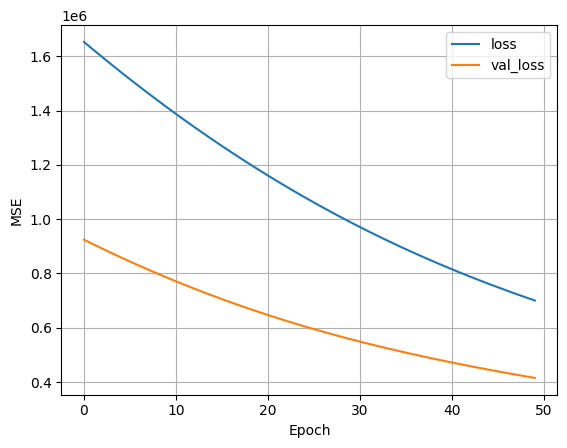

In [45]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


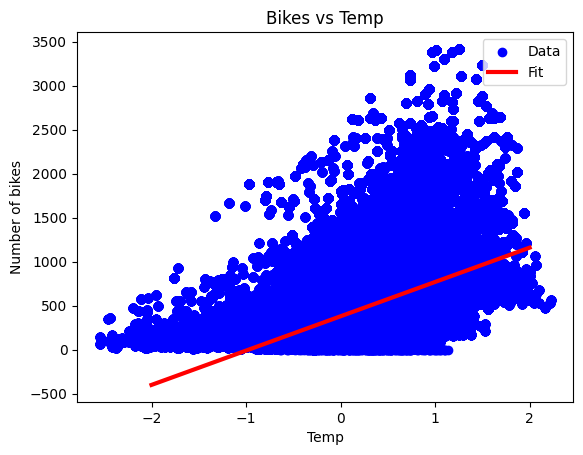

In [46]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-2, 2, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Neural Network
Simple Regression

In [13]:
_, X_train_temp, y_train_temp = scale_dataset(train, 'Rented_Bike_Count',['Temperature'], over_sampling = True)
_, X_valid_temp, y_valid_temp = scale_dataset(valid, 'Rented_Bike_Count',['Temperature'])
_, X_test_temp, y_test_temp = scale_dataset(test, 'Rented_Bike_Count',['Temperature'])

In [14]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [16]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [17]:
history = nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=50,
    validation_data=(X_valid_temp, y_valid_temp)
)

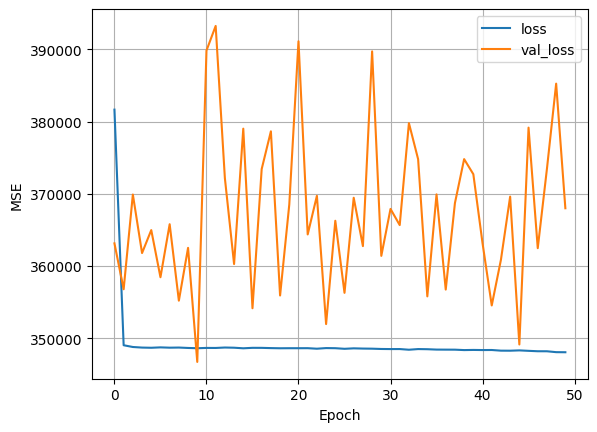

In [20]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


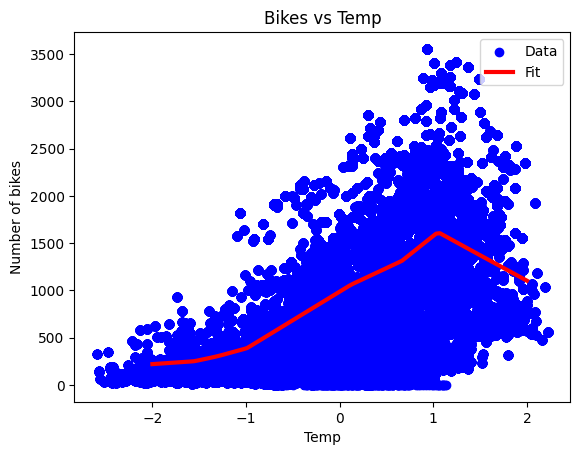

In [21]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-2, 2, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

Multiple Regression

In [26]:
_, X_train, y_train = scale_dataset(train, 'Rented_Bike_Count', over_sampling = True)
_, X_valid, y_valid = scale_dataset(valid, 'Rented_Bike_Count')
_, X_test, y_test = scale_dataset(test, 'Rented_Bike_Count')

In [27]:
normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
normalizer.adapt(X_train)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [29]:
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    verbose=0, epochs=50
)

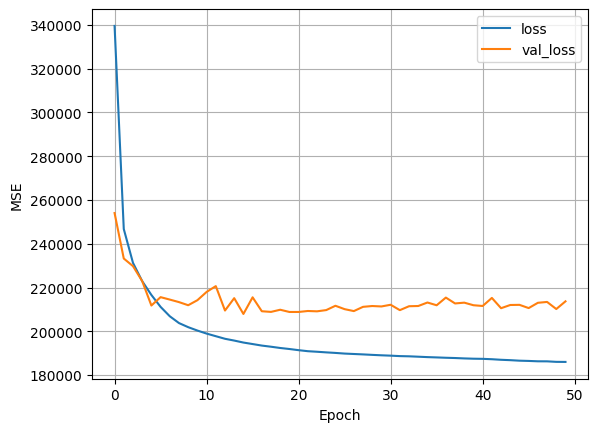

In [58]:
plot_loss(history)

In [44]:
y_pred_nn = nn_model.predict(X_test)
y_pred_lin = reg_model.predict(X_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


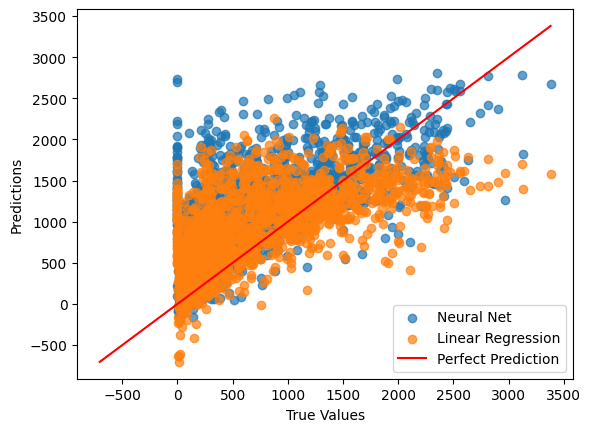

In [54]:
plt.scatter(y_test,y_pred_nn,label='Neural Net',alpha=0.7)
plt.scatter(y_test,y_pred_lin,label='Linear Regression',alpha=0.7)
min_val = min(y_test.min(),y_pred_nn.min(),y_pred_lin.min())
max_val = max(y_test.max(),y_pred_nn.max(),y_pred_lin.max())
plt.plot([min_val,max_val],[min_val,max_val], label='Perfect Prediction', color='red')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()